In [23]:
import pandas as pd
import os

dfs = []
for file in os.listdir('../experiment_summaries'):
    if file.endswith('.csv'):
        df = pd.read_csv(os.path.join('../experiment_summaries', file))
        dfs.append(df)
        print(f"Processed {file}")
    else:
        print(f"Skipping {file}, not a CSV file.")

# Concatenate all DataFrames into one
if dfs:
    df_to_analyze = pd.concat(dfs, ignore_index=True)


Processed experiment_summary_20250623_120442.csv
Skipping best_models_report_20250609_154758.json, not a CSV file.
Skipping best_models_report_20250624_203258.json, not a CSV file.
Processed experiment_summary_20250612_182834.csv
Processed experiment_summary_20250605_124218.csv
Processed experiment_summary_20250626_004520.csv
Skipping .DS_Store, not a CSV file.
Skipping best_models_report_20250625_122850.json, not a CSV file.
Processed experiment_summary_20250625_122850.csv
Skipping best_models_report_20250619_204934.json, not a CSV file.
Skipping best_models_report_20250629_130728.json, not a CSV file.
Processed experiment_summary_20250619_204934.csv
Processed experiment_summary_20250610_170901.csv
Skipping best_models_report_20250622_191517.json, not a CSV file.
Processed experiment_summary_20250615_095419.csv
Processed experiment_summary_20250627_014714.csv
Skipping best_models_report_20250627_102914.json, not a CSV file.
Processed experiment_summary_20250627_015027.csv
Skipping bes

In [24]:
df_to_analyze.sort_values(by=['feature_set', 'model_feature_combination', 'tuning_scoring_metric','test_mape'], ascending=False, inplace=True)

In [25]:
df_to_analyze.columns

Index(['model_feature_combination', 'model_name', 'feature_set', 'run_type',
       'experiment_name', 'run_id', 'run_name', 'num_selected_features',
       'n_features_selected', 'feature_mismatch', 'feature_count_match',
       'train_score', 'test_score', 'train_mape', 'test_mape', 'train_rmse',
       'test_rmse', 'train_r2', 'test_r2', 'cv_mape', 'tuning_duration',
       'total_duration', 'cv_folds', 'n_trials_optuna',
       'tuning_scoring_metric', 'start_time', 'end_time'],
      dtype='object')

In [26]:
df_to_analyze[df_to_analyze['model_feature_combination'].str.contains('umap')]

,model_feature_combination,model_name,feature_set,run_type,experiment_name,run_id,run_name,num_selected_features,n_features_selected,feature_mismatch,...,train_r2,test_r2,cv_mape,tuning_duration,total_duration,cv_folds,n_trials_optuna,tuning_scoring_metric,start_time,end_time
32,LightGBM_rfecv_all_nfeat_160_umap_count_loc_10...,LightGBM,rfecv_all_nfeat_160_umap_count_loc,best_run,RE price predictor - rfecv_all_nfeat_160_umap_...,b9b786ee3a13493eadc5ad8ba91e31f5,LightGBM_rfecv_all_nfeat_160_umap_count_loc_ma...,160.0,NaN,NaN,...,0.998640,0.945759,0.055661,19554.247612,19797.426261,5,100,mape,2025-06-15 09:34:11.325,2025-06-15 09:35:04.222
105,LightGBM_rfecv_all_nfeat_160_umap_count_loc_10...,LightGBM,rfecv_all_nfeat_160_umap_count_loc,best_run,RE price predictor - rfecv_all_nfeat_160_umap_...,b9b786ee3a13493eadc5ad8ba91e31f5,LightGBM_rfecv_all_nfeat_160_umap_count_loc_ma...,160.0,NaN,NaN,...,0.998640,0.945759,0.055661,19554.247612,19797.426261,5,100,mape,2025-06-15 09:34:11.325,2025-06-15 09:35:04.222
120,LightGBM_rfecv_all_nfeat_160_umap_count_loc_10...,LightGBM,rfecv_all_nfeat_160_umap_count_loc,best_run,RE price predictor - rfecv_all_nfeat_160_umap_...,b9b786ee3a13493eadc5ad8ba91e31f5,LightGBM_rfecv_all_nfeat_160_umap_count_loc_ma...,160.0,NaN,NaN,...,0.998640,0.945759,0.055661,19554.247612,19797.426261,5,100,mape,2025-06-15 09:34:11.325,2025-06-15 09:35:04.222
188,LightGBM_rfecv_all_nfeat_160_umap_count_loc_10...,LightGBM,rfecv_all_nfeat_160_umap_count_loc,best_run,RE price predictor - rfecv_all_nfeat_160_umap_...,b9b786ee3a13493eadc5ad8ba91e31f5,LightGBM_rfecv_all_nfeat_160_umap_count_loc_ma...,160.0,NaN,NaN,...,0.998640,0.945759,0.055661,19554.247612,19797.426261,5,100,mape,2025-06-15 09:34:11.325,2025-06-15 09:35:04.222
343,LightGBM_rfecv_all_nfeat_160_umap_count_loc_10...,LightGBM,rfecv_all_nfeat_160_umap_count_loc,best_run,RE price predictor - rfecv_all_nfeat_160_umap_...,b9b786ee3a13493eadc5ad8ba91e31f5,LightGBM_rfecv_all_nfeat_160_umap_count_loc_ma...,160.0,NaN,NaN,...,0.998640,0.945759,0.055661,19554.247612,19797.426261,5,100,mape,2025-06-15 09:34:11.325,2025-06-15 09:35:04.222
13,LightGBM_rfecv_all_nfeat_158_umap_count_loc_50...,LightGBM,rfecv_all_nfeat_158_umap_count_loc,best_run,RE price predictor - rfecv_all_nfeat_158_umap_...,6e7d4b1cea3c4ba5a812bacddea126db,LightGBM_rfecv_all_nfeat_158_umap_count_loc_ma...,NaN,NaN,NaN,...,0.999894,0.939374,0.061354,21595.162922,22116.758689,5,50,mape,2025-06-19 15:16:58.802,2025-06-19 15:18:32.311
91,LightGBM_rfecv_all_nfeat_158_umap_count_loc_50...,LightGBM,rfecv_all_nfeat_158_umap_count_loc,best_run,RE price predictor - rfecv_all_nfeat_158_umap_...,6e7d4b1cea3c4ba5a812bacddea126db,LightGBM_rfecv_all_nfeat_158_umap_count_loc_ma...,NaN,NaN,NaN,...,0.999894,0.939374,0.061354,21595.162922,22116.758689,5,50,mape,2025-06-19 15:16:58.802,2025-06-19 15:18:32.311
171,LightGBM_rfecv_all_nfeat_158_umap_count_loc_50...,LightGBM,rfecv_all_nfeat_158_umap_count_loc,best_run,RE price predictor - rfecv_all_nfeat_158_umap_...,6e7d4b1cea3c4ba5a812bacddea126db,LightGBM_rfecv_all_nfeat_158_umap_count_loc_ma...,NaN,NaN,NaN,...,0.999894,0.939374,0.061354,21595.162922,22116.758689,5,50,mape,2025-06-19 15:16:58.802,2025-06-19 15:18:32.311
328,LightGBM_rfecv_all_nfeat_158_umap_count_loc_50...,LightGBM,rfecv_all_nfeat_158_umap_count_loc,best_run,RE price predictor - rfecv_all_nfeat_158_umap_...,6e7d4b1cea3c4ba5a812bacddea126db,LightGBM_rfecv_all_nfeat_158_umap_count_loc_ma...,NaN,NaN,NaN,...,0.999894,0.939374,0.061354,21595.162922,22116.758689,5,50,mape,2025-06-19 15:16:58.802,2025-06-19 15:18:32.311
22,LightGBM_rfecv_all_nfeat_158_umap_count_loc_10...,LightGBM,rfecv_all_nfeat_158_umap_count_loc,best_run,RE price predictor - rfecv_all_nfeat_158_umap_...,a69e55f0afee411c838a9f9d6255bec1,LightGBM_rfecv_all_nfeat_158_umap_count_loc_ma...,NaN,NaN,NaN,...,0.999481,0.943298,0.060145,24299.953831,26257.036217,5,100,mape,2025-06-17 16:34:05.499,2025-06-17 16:35:34.610


In [27]:
df_to_analyze['feature_count_match'] = df_to_analyze['feature_count_match'].fillna(False)
df_to_analyze['version'] = df_to_analyze['run_name'].str.extract(r'v(\d+)')
df_to_analyze = df_to_analyze[df_to_analyze['end_time']>= '2025-06-10 00:00:00']

/var/folders/3r/_0ptqbr15_970chzxcs_tb040000gn/T/ipykernel_7586/219996769.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_to_analyze['feature_count_match'] = df_to_analyze['feature_count_match'].fillna(False)


In [28]:
df_to_analyze['model_feature_combination'].loc[2]

'XGBoost_rfecv_base_poi_pano_nfeat_158_nonpca_count_loc_50_mape'

In [29]:
print("Concatenated DataFrame shape:", df_to_analyze.shape)
df_to_analyze.drop_duplicates(subset=['model_feature_combination', 'version', 'run_name', 'tuning_scoring_metric'], keep='last', inplace=True)
print("DataFrame shape after dropping duplicates:", df_to_analyze.shape)

Concatenated DataFrame shape: (331, 28)
DataFrame shape after dropping duplicates: (54, 28)


In [37]:
df_to_analyze[df_to_analyze['version']==8]


,model_feature_combination,model_name,feature_set,run_type,experiment_name,run_id,run_name,num_selected_features,n_features_selected,feature_mismatch,...,cv_mape,tuning_duration,total_duration,cv_folds,n_trials_optuna,tuning_scoring_metric,start_time,end_time,version,feature_set2
321,XGBoost_rfecv_base_poi_pano_nfeat_158_nonpca_c...,XGBoost,rfecv_base_poi_pano_158_nonpca_loc,best_run,RE price predictor - rfecv_base_poi_pano_nfeat...,7e33a923af954d92b9d9abd72ff621b9,XGBoost_rfecv_base_poi_pano_nfeat_158_nonpca_c...,NaN,NaN,NaN,...,0.062797,1015.202720,1053.232189,5,100,mape,2025-06-25 22:30:39.574,2025-06-25 22:30:41.717,8,rfecv_base_poi_pano_158_nonpca_loc
320,XGBoostQuantile_rfecv_base_poi_pano_nfeat_158_...,XGBoostQuantile,rfecv_base_poi_pano_158_nonpca_loc,best_run,RE price predictor - rfecv_base_poi_pano_nfeat...,4cbe0ea4aae04a30ac33cb68a42a4904,XGBoostQuantile_rfecv_base_poi_pano_nfeat_158_...,NaN,NaN,NaN,...,0.062445,51624.368489,51933.331493,5,100,mape,2025-06-26 12:56:15.043,2025-06-26 12:56:20.184,8,rfecv_base_poi_pano_158_nonpca_loc
281,RandomForest_rfecv_base_poi_pano_nfeat_158_non...,RandomForest,rfecv_base_poi_pano_158_nonpca_loc,best_run,RE price predictor - rfecv_base_poi_pano_nfeat...,fe72a2d7a2ee47308f20fe884d61ddcc,RandomForest_rfecv_base_poi_pano_nfeat_158_non...,NaN,NaN,NaN,...,0.068580,26459.143237,26482.564698,5,100,mape,2025-06-27 22:36:37.227,2025-06-27 22:36:40.015,8,rfecv_base_poi_pano_158_nonpca_loc
331,LightGBM_rfecv_base_poi_pano_nfeat_158_nonpca_...,LightGBM,rfecv_base_poi_pano_158_nonpca_loc,best_run,RE price predictor - rfecv_base_poi_pano_nfeat...,4dcb0f3d6ce64e6e9923fae7803973de,LightGBM_rfecv_base_poi_pano_nfeat_158_nonpca_...,NaN,NaN,NaN,...,0.061280,22878.846398,23137.748054,5,100,mape,2025-06-20 17:43:39.734,2025-06-20 17:44:19.704,8,rfecv_base_poi_pano_158_nonpca_loc
308,XGBoost_rfecv_base_nfeat_56_nonpca_count_100_mape,XGBoost,rfecv_base_56_nonpca,best_run,RE price predictor - rfecv_base_nfeat_56_nonpc...,683a45105d6d4a61a82a59698e29830d,XGBoost_rfecv_base_nfeat_56_nonpca_count_mape_...,NaN,NaN,NaN,...,0.076409,153.985568,157.360962,5,100,mape,2025-06-25 21:56:52.401,2025-06-25 21:56:54.324,8,rfecv_base_56_nonpca
309,XGBoostQuantile_rfecv_base_nfeat_56_nonpca_cou...,XGBoostQuantile,rfecv_base_56_nonpca,best_run,RE price predictor - rfecv_base_nfeat_56_nonpc...,6e965011492348c0a8d96929910c8c87,XGBoostQuantile_rfecv_base_nfeat_56_nonpca_cou...,NaN,NaN,NaN,...,0.076053,933.395818,960.259298,5,100,mape,2025-06-25 22:12:54.580,2025-06-25 22:12:57.376,8,rfecv_base_56_nonpca
266,RandomForest_rfecv_base_nfeat_56_nonpca_count_...,RandomForest,rfecv_base_56_nonpca,best_run,RE price predictor - rfecv_base_nfeat_56_nonpc...,c4c9bd330be44ce39262cb8784a2e190,RandomForest_rfecv_base_nfeat_56_nonpca_count_...,NaN,NaN,NaN,...,0.082297,2967.858457,2980.142699,5,100,mape,2025-06-27 15:15:02.850,2025-06-27 15:15:06.190,8,rfecv_base_56_nonpca
325,LightGBM_rfecv_base_nfeat_56_nonpca_count_100_...,LightGBM,rfecv_base_56_nonpca,best_run,RE price predictor - rfecv_base_nfeat_56_nonpc...,6c8c3cad92704a3b8b05e55cfdbea4b3,LightGBM_rfecv_base_nfeat_56_nonpca_count_mape...,NaN,NaN,NaN,...,0.071007,3932.583581,4364.607365,5,100,mape,2025-06-20 11:16:54.125,2025-06-20 11:17:52.856,8,rfecv_base_56_nonpca
310,LightGBM_rfecv_base_img_nfeat_56_pca_count_50_...,LightGBM,rfecv_base_img_56_pca_50,best_run,RE price predictor - rfecv_base_img_nfeat_56_p...,b49ffbbee9a040a8aa74013707b9f0f2,LightGBM_rfecv_base_img_nfeat_56_pca_count_50_...,NaN,NaN,NaN,...,0.073009,10070.845355,10239.483079,5,100,mape,2025-06-24 00:53:28.719,2025-06-24 00:53:32.375,8,rfecv_base_img_56_pca_50
311,XGBoost_rfecv_base_img_nfeat_56_pca_count_100_...,XGBoost,rfecv_base_img_56_pca,best_run,RE price predictor - rfecv_base_img_nfeat_56_p...,49c222072af5479ebc5a9c45c85681ed,XGBoost_rfecv_base_img_nfeat_56_pca_count_mape...,NaN,NaN,NaN,...,0.073099,1712.918949,1771.524035,5,100,mape,2025-06-26 13:26:00.574,2025-06-26 13:26:03.233,8,rfecv_base_img_56_pca


In [30]:
df_to_analyze['feature_mismatch'].value_counts()

Series([], Name: count, dtype: int64)

In [31]:
df_to_analyze[df_to_analyze['feature_mismatch']==-12.0]

,model_feature_combination,model_name,feature_set,run_type,experiment_name,run_id,run_name,num_selected_features,n_features_selected,feature_mismatch,...,test_r2,cv_mape,tuning_duration,total_duration,cv_folds,n_trials_optuna,tuning_scoring_metric,start_time,end_time,version


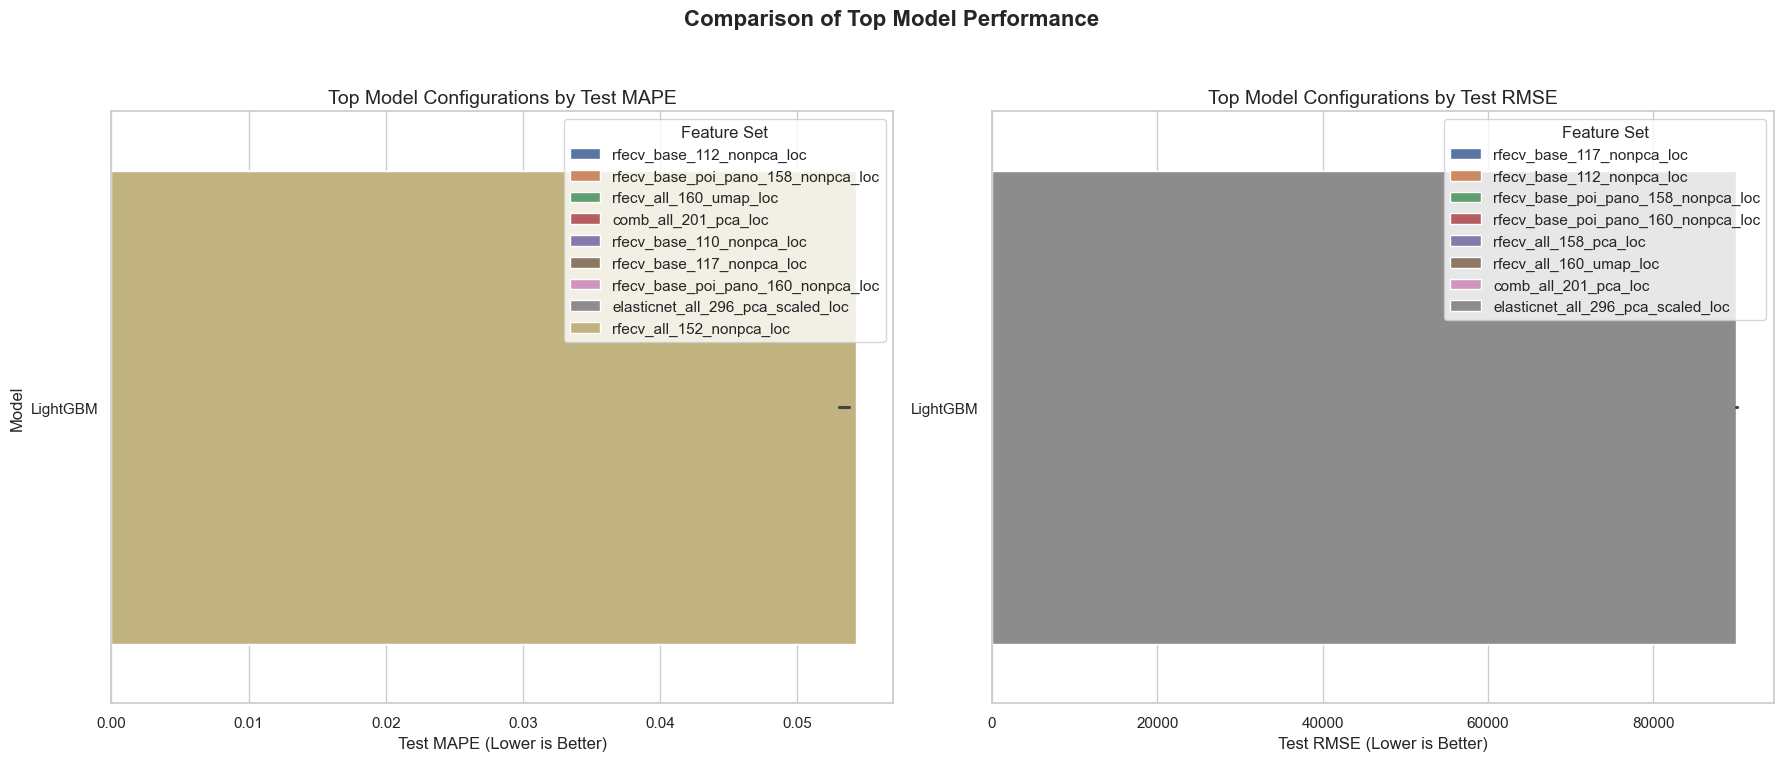

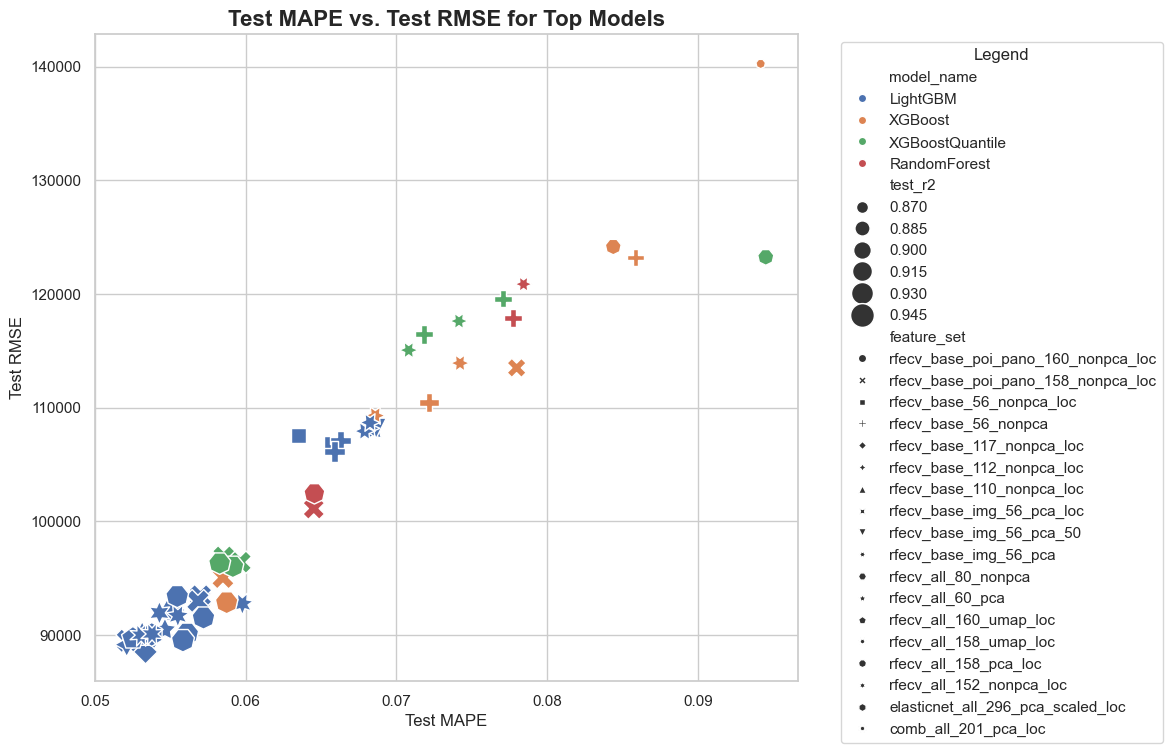

In [32]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


df_to_analyze['feature_set'] = df_to_analyze['feature_set'].str.replace('_count', '').str.replace('nfeat_', '')
sns.set_theme(style="whitegrid")

# 1. Best models by Test MAPE
best_by_mape = df_to_analyze.sort_values("test_mape").reset_index(drop=True)


# 2. Best models by Test RMSE
best_by_rmse = df_to_analyze.sort_values("test_rmse").reset_index(drop=True)


# a) Bar Plot: Model Performance Comparison
fig1, ax1 = plt.subplots(1, 2, figsize=(18, 8))
sns.barplot(data=best_by_mape.head(10), y='model_name', x='test_mape', hue='feature_set', dodge=False, ax=ax1[0], orient='h')
ax1[0].set_title('Top Model Configurations by Test MAPE', fontsize=14)
ax1[0].set_xlabel('Test MAPE (Lower is Better)', fontsize=12)
ax1[0].set_ylabel('Model', fontsize=12)
ax1[0].legend(title='Feature Set')


sns.barplot(data=best_by_rmse.head(10), y='model_name', x='test_rmse', hue='feature_set', dodge=False, ax=ax1[1], orient='h')
ax1[1].set_title('Top Model Configurations by Test RMSE', fontsize=14)
ax1[1].set_xlabel('Test RMSE (Lower is Better)', fontsize=12)
ax1[1].set_ylabel('')
ax1[1].legend(title='Feature Set')
fig1.suptitle('Comparison of Top Model Performance', fontsize=16, fontweight='bold')
fig1.tight_layout(rect=[0, 0.03, 1, 0.95])

# b) Scatter Plot: MAPE vs RMSE
fig2, ax2 = plt.subplots(figsize=(12, 8))
sns.scatterplot(data=df_to_analyze, x='test_mape', y='test_rmse', hue='model_name', size='test_r2', style='feature_set', ax=ax2, sizes=(50, 300))
ax2.set_title('Test MAPE vs. Test RMSE for Top Models', fontsize=16, fontweight='bold')
ax2.set_xlabel('Test MAPE', fontsize=12)
ax2.set_ylabel('Test RMSE', fontsize=12)
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Legend')
fig2.tight_layout()


plt.show()

In [33]:

df_to_analyze['feature_set2'] = df_to_analyze['feature_set'].str.replace('_count', '').str.replace('nfeat_', '')
#df_to_analyze['feature_set2'] = df_to_analyze['feature_set2'].str.replace('base_56_nonpca_loc', 'base_56_nonpca').str.replace('rfecv_base_img_56_pca_loc', 'base_56_pca')
pd.pivot_table(df_to_analyze, values='test_rmse', index='model_name', columns='feature_set2', aggfunc='min').round(1)

feature_set2,comb_all_201_pca_loc,elasticnet_all_296_pca_scaled_loc,rfecv_all_152_nonpca_loc,rfecv_all_158_pca_loc,rfecv_all_158_umap_loc,rfecv_all_160_umap_loc,rfecv_all_60_pca,rfecv_all_80_nonpca,rfecv_base_110_nonpca_loc,rfecv_base_112_nonpca_loc,rfecv_base_117_nonpca_loc,rfecv_base_56_nonpca,rfecv_base_56_nonpca_loc,rfecv_base_img_56_pca,rfecv_base_img_56_pca_50,rfecv_base_img_56_pca_loc,rfecv_base_poi_pano_158_nonpca_loc,rfecv_base_poi_pano_160_nonpca_loc
model_name,,,,,,,,,,,,,,,,,,
LightGBM,89996.2,90059.9,91959.8,89555.6,91728.0,89715.0,90464.3,92210.6,90154.2,89163.4,88525.7,106173.0,106883.3,107943.7,108191.8,107967.7,89503.6,89552.8
RandomForest,NaN,NaN,NaN,102474.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117859.1,NaN,120871.4,NaN,NaN,101133.4,NaN
XGBoost,NaN,NaN,NaN,92897.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110462.0,NaN,109311.9,NaN,NaN,95060.8,NaN
XGBoostQuantile,NaN,NaN,NaN,96050.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116455.1,NaN,115067.7,NaN,NaN,96414.4,NaN


In [34]:
pd.pivot_table(df_to_analyze, values='test_mape', index=['n_trials_optuna', 'model_name', 'version'], columns='feature_set2', aggfunc='min').round(4)

feature_set2                             comb_all_201_pca_loc  \
n_trials_optuna model_name      version                         
1               XGBoost         1                         NaN   
                XGBoostQuantile 1                         NaN   
50              LightGBM        7                         NaN   
                XGBoost         7                         NaN   
                XGBoostQuantile 7                         NaN   
100             LightGBM        1                      0.0538   
                                5                         NaN   
                                6                         NaN   
                                8                         NaN   
                                9                         NaN   
                RandomForest    8                         NaN   
                XGBoost         8                         NaN   
                XGBoostQuantile 8                         NaN   
200             LightGBM        9                         NaN   
300             LightGBM        3                      0.0531   

feature_set2                             elasticnet_all_296_pca_scaled_loc  \
n_trials_optuna model_name      version                                      
1               XGBoost         1                                      NaN   
                XGBoostQuantile 1                                      NaN   
50              LightGBM        7                                      NaN   
                XGBoost         7                                      NaN   
                XGBoostQuantile 7                                      NaN   
100             LightGBM        1                                   0.0538   
                                5                                      NaN   
                                6                                      NaN   
                                8                                      NaN   
                                9                                      NaN   
                RandomForest    8                                      NaN   
                XGBoost         8                                      NaN   
                XGBoostQuantile 8                                      NaN   
200             LightGBM        9                                      NaN   
300             LightGBM        3                                      NaN   

feature_set2                             rfecv_all_152_nonpca_loc  \
n_trials_optuna model_name      version                             
1               XGBoost         1                             NaN   
                XGBoostQuantile 1                             NaN   
50              LightGBM        7                             NaN   
                XGBoost         7                             NaN   
                XGBoostQuantile 7                             NaN   
100             LightGBM        1                          0.0543   
                                5                             NaN   
                                6                             NaN   
                                8                             NaN   
                                9                             NaN   
                RandomForest    8                             NaN   
                XGBoost         8                             NaN   
                XGBoostQuantile 8                             NaN   
200             LightGBM        9                             NaN   
300             LightGBM        3                             NaN   

feature_set2                             rfecv_all_158_pca_loc  \
n_trials_optuna model_name      version                          
1               XGBoost         1                       0.0844   
                XGBoostQuantile 1                       0.0945   
50              LightGBM        7                       0.0572   
                XGBoost         7                       0.0942 

<Axes: xlabel='None-feature_set2', ylabel='version-model_name'>

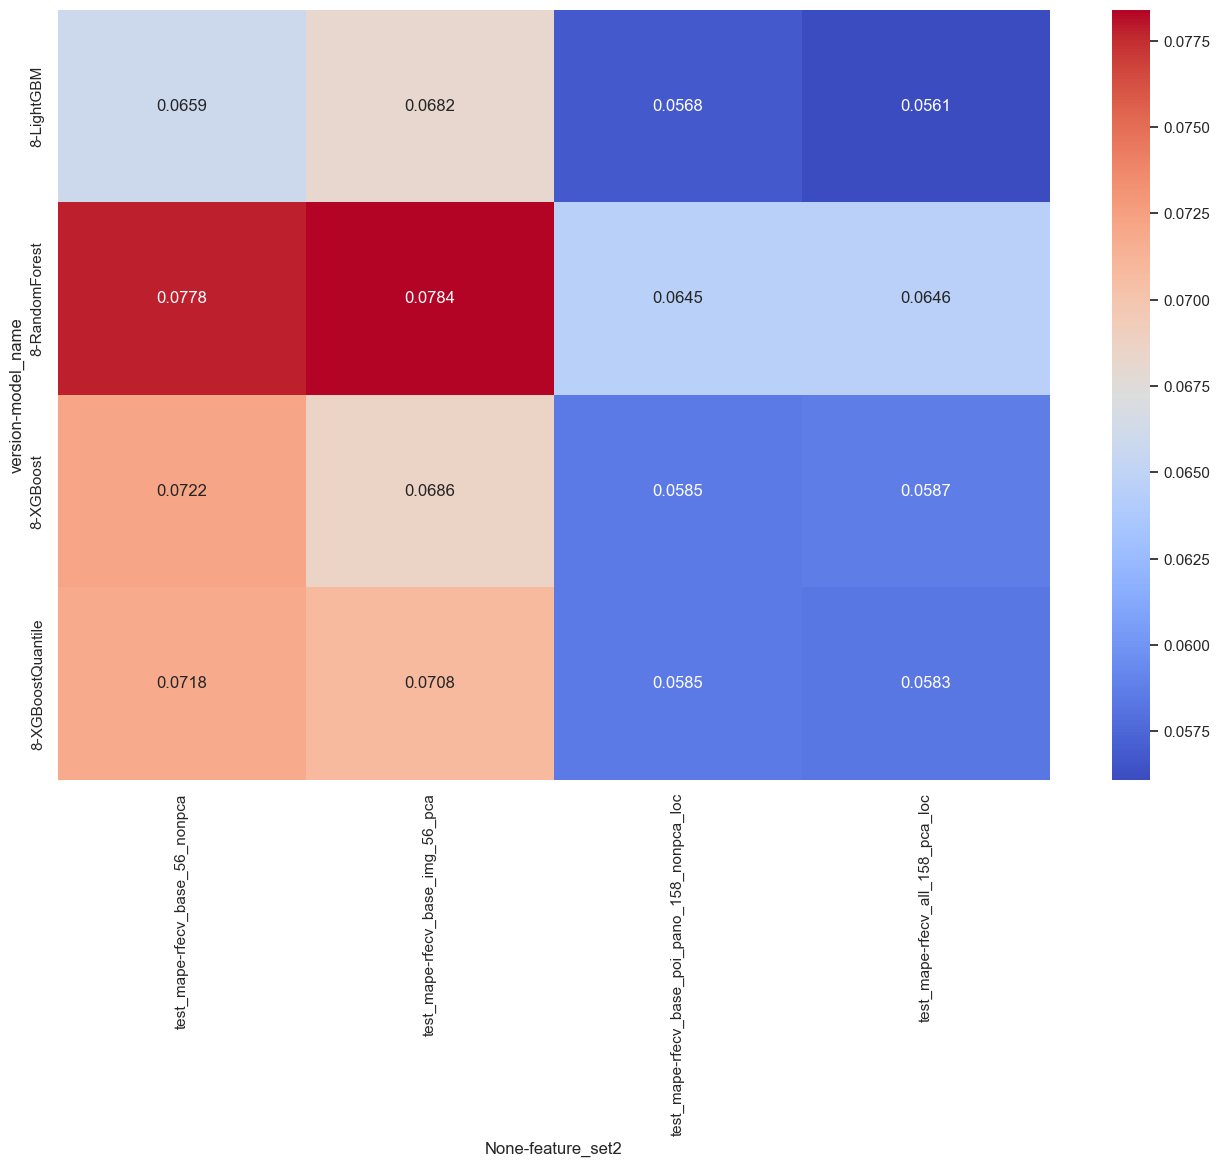

In [35]:
df_to_analyze['version'] = df_to_analyze['version'].astype(int)
filter1= df_to_analyze['n_trials_optuna'].isin(['100', 100])
filter2= df_to_analyze['tuning_scoring_metric']=='mape'
filter3= df_to_analyze['version']==8
filter4= (~df_to_analyze['feature_set2'].str.contains('umap') ) & (~df_to_analyze['feature_set2'].str.contains('base_56_nonpca_loc|base_img_56_pca_loc|base_img_56_pca_50', regex=True))

pivot_table = pd.pivot_table(df_to_analyze[filter2 & filter3 & filter4], 
                             values=['test_mape', ], # 'train_mape',  'train_rmse', 'test_rmse' 
                             index=['version', 'model_name', ], 
                             columns='feature_set2', aggfunc='min').round(4)


sets = ['rfecv_base_56_nonpca',  'rfecv_base_img_56_pca',
        'rfecv_base_poi_pano_158_nonpca_loc', 
        'rfecv_all_158_pca_loc', ]
pivot_table = pivot_table[[('test_mape', set_name) for set_name in sets]]


import seaborn as sns

plt.figure(figsize=(16, 10))
sns.heatmap(pivot_table, annot=True, fmt=".4f", cmap='coolwarm', )


 # elasticnet_all_296_pca_scaled_loc, 

feature_set2,base_56,base_img_56_pca,base_poi_pano_158,all_158_pca
model_name,,,,
LightGBM,6.59,6.82,5.68,5.61
RandomForest,7.78,7.84,6.45,6.46
XGBoost,7.22,6.86,5.85,5.87
XGBoostQuantile,7.18,7.08,5.85,5.83


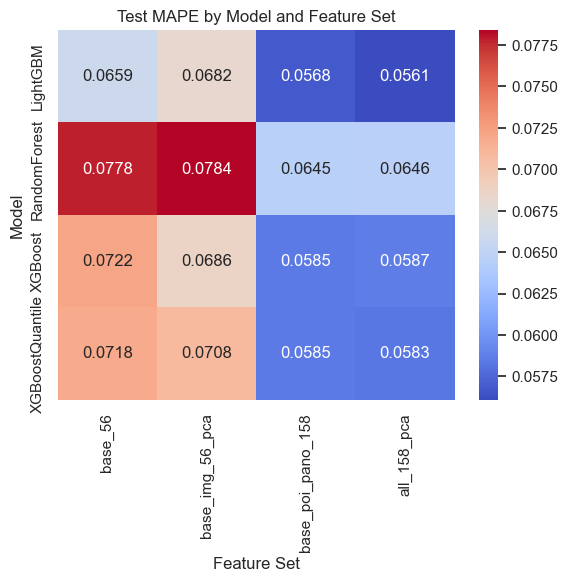

In [63]:
df_to_analyze['version'] = df_to_analyze['version'].astype(int)
filter1= df_to_analyze['n_trials_optuna'].isin(['100', 100])
filter2= df_to_analyze['tuning_scoring_metric']=='mape'
filter3= df_to_analyze['version']==8
filter4= (~df_to_analyze['feature_set2'].str.contains('umap') ) & (~df_to_analyze['feature_set2'].str.contains('base_56_nonpca_loc|base_img_56_pca_loc|base_img_56_pca_50', regex=True))

pivot_table = pd.pivot_table(df_to_analyze[filter2 & filter3 & filter4], 
                             values=['test_mape', ], # 'train_mape',  'train_rmse', 'test_rmse' 
                             index=['model_name', ], 
                             columns='feature_set2', aggfunc='min').round(4)


sets = ['rfecv_base_56_nonpca',  'rfecv_base_img_56_pca',
        'rfecv_base_poi_pano_158_nonpca_loc', 
        'rfecv_all_158_pca_loc', ]
pivot_table = pivot_table[[('test_mape', set_name) for set_name in sets]]
pivot_table.columns = pivot_table.columns.droplevel(0)
pivot_table.columns = pivot_table.columns.str.replace('rfecv_|_nonpca|_loc', '', regex=True)
display(pivot_table*100)



import seaborn as sns

#plt.figure(figsize=(16, 10))
sns.heatmap(pivot_table, annot=True, fmt=".4f", cmap='coolwarm', )
plt.ylabel('Model')
plt.xlabel('Feature Set')
plt.title('Test MAPE by Model and Feature Set')
plt.margins(x=0.5, y=0.5)
plt.show()


 # elasticnet_all_296_pca_scaled_loc, 

In [65]:
pivot_table*100

feature_set2,base_56,base_img_56_pca,base_poi_pano_158,all_158_pca
model_name,,,,
LightGBM,6.59,6.82,5.68,5.61
RandomForest,7.78,7.84,6.45,6.46
XGBoost,7.22,6.86,5.85,5.87
XGBoostQuantile,7.18,7.08,5.85,5.83


In [62]:
pivot_table = pd.pivot_table(df_to_analyze[filter2 & filter3 & filter4], 
                             values=['test_mape', 'test_rmse'], # 'train_mape',  'train_rmse', 'test_rmse' 
                             index=['model_name', ], 
                             columns='feature_set2', aggfunc='min').round(1)


sets = ['rfecv_base_56_nonpca',  'rfecv_base_img_56_pca',
        'rfecv_base_poi_pano_158_nonpca_loc', 
        'rfecv_all_158_pca_loc', ]
pivot_table = pivot_table[[('test_rmse', set_name) for set_name in sets]]
pivot_table.columns = pivot_table.columns.droplevel(0)
pivot_table.columns = pivot_table.columns.str.replace('rfecv_|_nonpca|_loc', '', regex=True)
pivot_table


feature_set2,base_56,base_img_56_pca,base_poi_pano_158,all_158_pca
model_name,,,,
LightGBM,106173.0,108700.7,92994.4,90125.3
RandomForest,117859.1,120871.4,101133.4,102474.2
XGBoost,110462.0,109311.9,95060.8,92897.4
XGBoostQuantile,116455.1,115067.7,96888.0,96336.6
